**This file contains the code for Basic EDA Feature Engineering Feature Sealection Hyperparameter Tuning for casual users**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install dython

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from dython import nominal
import pickle
import warnings
warnings.filterwarnings('ignore')

**Loading the train dataset**

In [ ]:
train_df=pd.read_csv('/content/drive/MyDrive/train_bk.csv')

In [ ]:
train_df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [ ]:
train_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


**Coverting datetime to pandas datetime object and adding basic timestamp features such as hour month day year etc**

In [ ]:
train_df['datetime']=pd.to_datetime(train_df['datetime'])

In [ ]:
train_df['hour']=train_df['datetime'].dt.hour
train_df['month']=train_df['datetime'].dt.month
train_df['day']=train_df['datetime'].dt.day
train_df['year']=train_df['datetime'].dt.year

**Starting of Basic EDA**

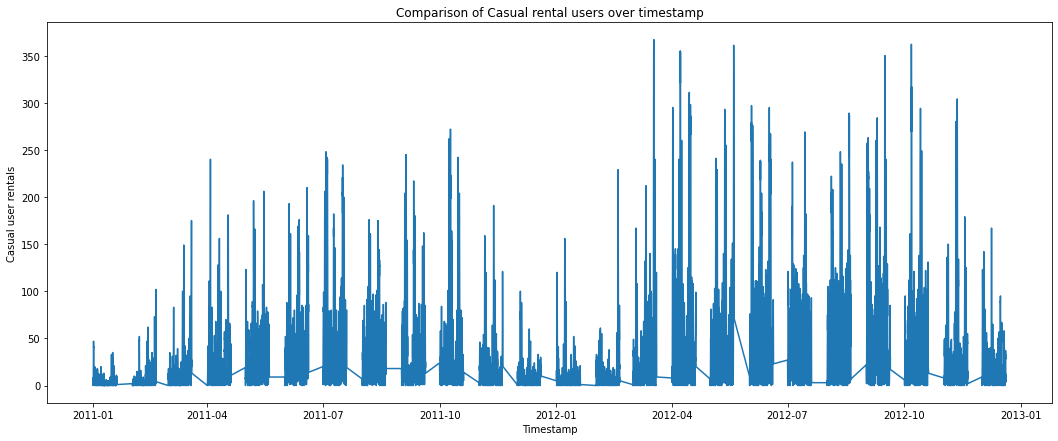

In [ ]:
fig,ax=plt.subplots(figsize=(18,7))
ax.plot(train_df['datetime'],train_df['casual'])
plt.xlabel('Timestamp')
plt.ylabel('Casual user rentals')
plt.title('Comparison of Casual rental users over timestamp')
plt.show()

**Here we can see the plot of casual rental users over two year timeframe.An increasing trend is observed here**

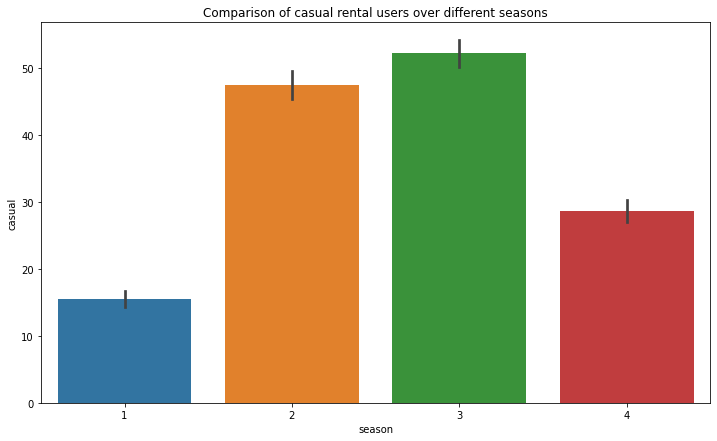

In [ ]:
fig,ax=plt.subplots(figsize=(12,7))
sns.barplot(data=train_df,x='season',y='casual',ax=ax)
plt.title('Comparison of casual rental users over different seasons')
plt.show()

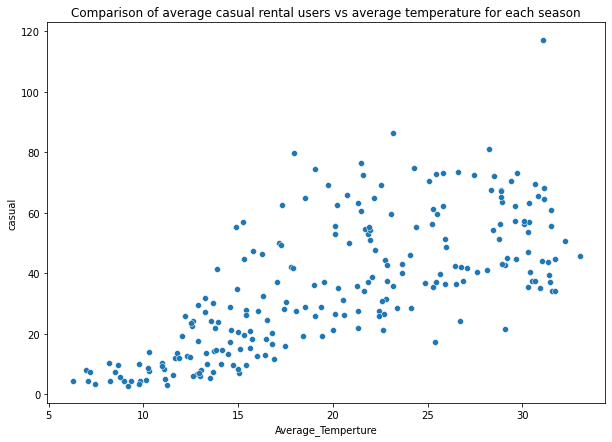

In [ ]:
fig,ax=plt.subplots(figsize=(10,7))
z=train_df.groupby(['season','month','day'])['temp','casual'].mean().reset_index()
sns.scatterplot(data=z,x='temp',y='casual',ax=ax)
plt.xlabel('Average_Temperture')
plt.title('Comparison of average casual rental users vs average temperature for each season')
plt.show()

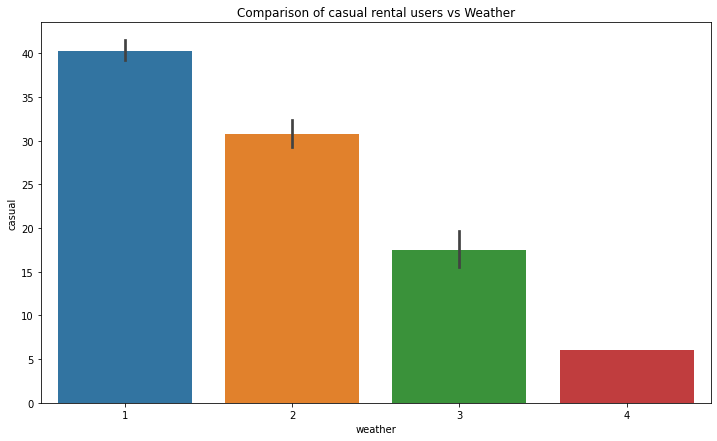

In [ ]:
fig,ax=plt.subplots(figsize=(12,7))
sns.barplot(data=train_df,x='weather',y='casual',ax=ax)
plt.title('Comparison of casual rental users vs Weather')
plt.show()

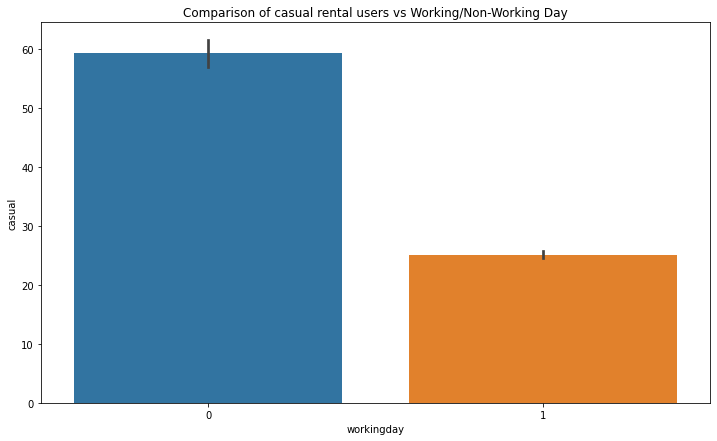

In [ ]:
fig,ax=plt.subplots(figsize=(12,7))
sns.barplot(data=train_df,x='workingday',y='casual',ax=ax)
plt.title('Comparison of casual rental users vs Working/Non-Working Day')
plt.show()

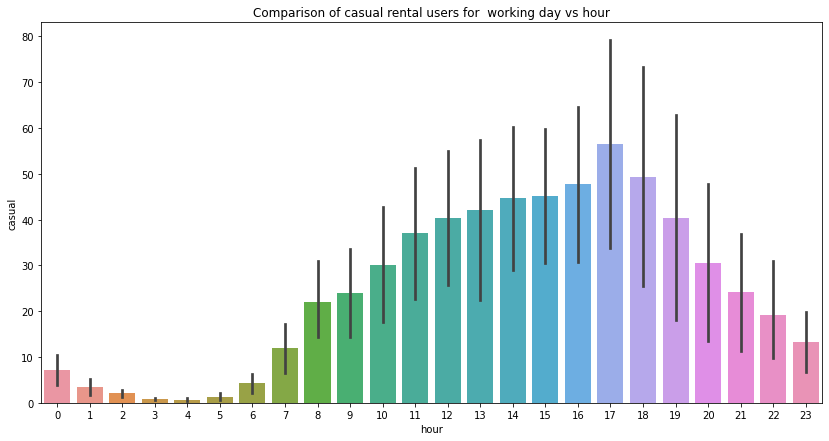

In [ ]:
fig,ax=plt.subplots(figsize=(14,7))
z=train_df.groupby(['season','workingday','hour'])[['casual']].mean().reset_index()
sns.barplot(data=z[z['workingday']==1],x='hour',y='casual',ax=ax)
plt.title('Comparison of casual rental users for  working day vs hour')
plt.show()

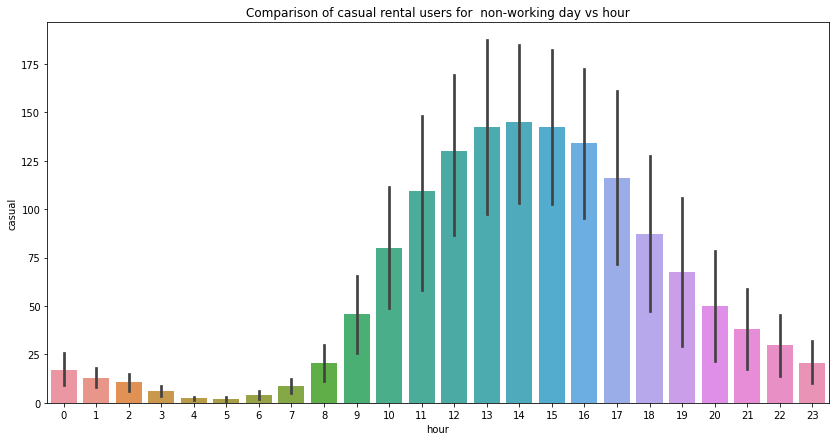

In [ ]:
fig,ax=plt.subplots(figsize=(14,7))
z=train_df.groupby(['season','workingday','hour'])[['casual']].mean().reset_index()
sns.barplot(data=z[z['workingday']==0],x='hour',y='casual',ax=ax)
plt.title('Comparison of casual rental users for  non-working day vs hour')
plt.show()

In [ ]:
tr_corr=train_df[['temp','atemp','humidity','windspeed','casual']].corr(method='pearson')
tr_corr.style.background_gradient(cmap='hot_r').set_precision(2) 

,temp,atemp,humidity,windspeed,casual
temp,1.00,0.98,-0.06,-0.02,0.47
atemp,0.98,1.00,-0.04,-0.06,0.46
humidity,-0.06,-0.04,1.00,-0.32,-0.35
windspeed,-0.02,-0.06,-0.32,1.00,0.09
casual,0.47,0.46,-0.35,0.09,1.00


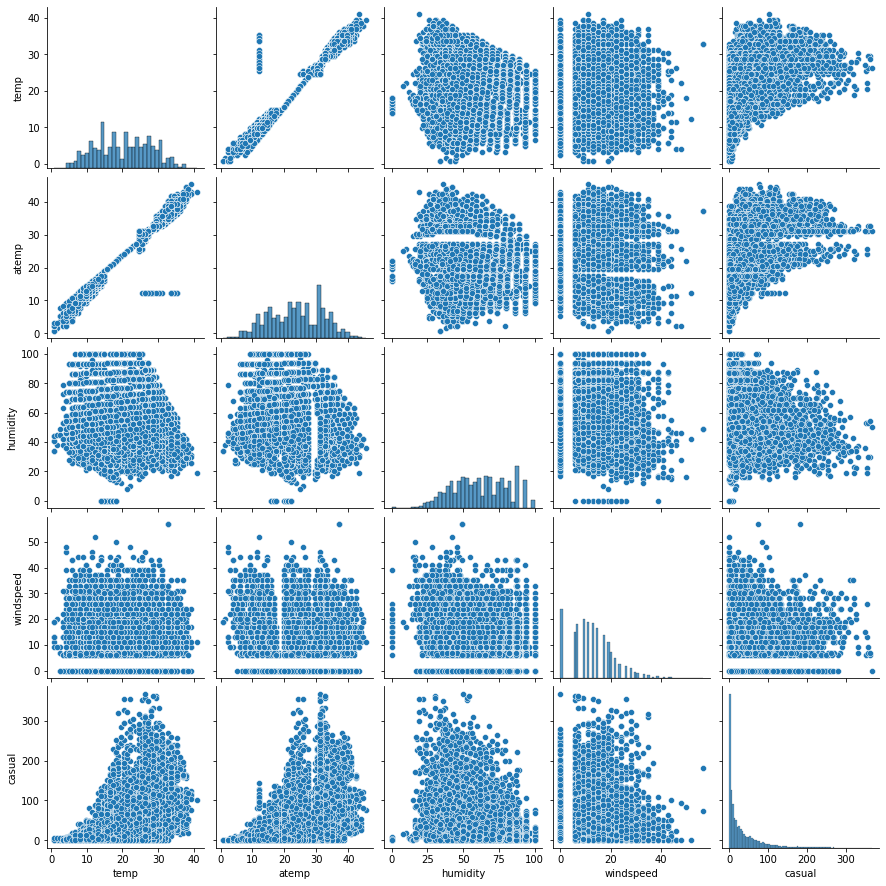

In [ ]:
sns.pairplot(train_df[['temp','atemp','humidity','windspeed','casual']])
plt.show()

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

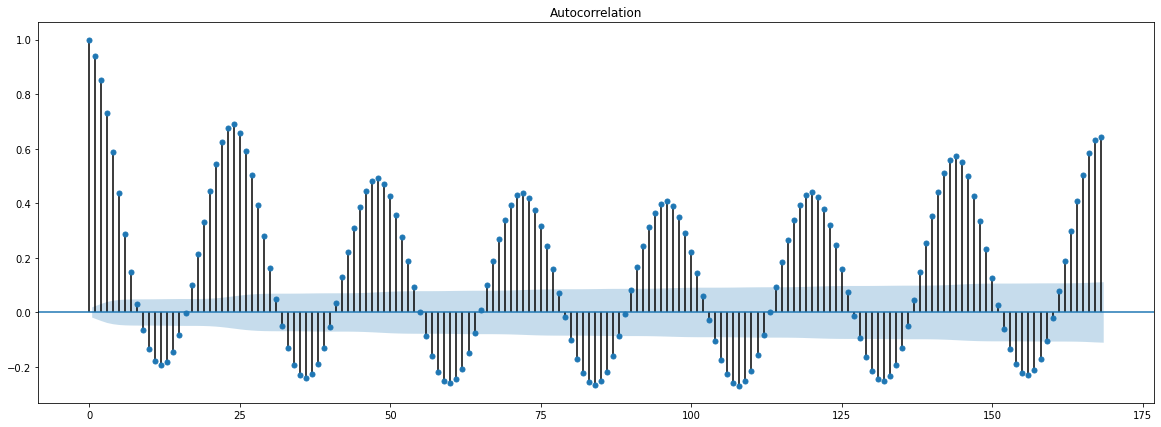

In [ ]:
fig,ax=plt.subplots(figsize=(20,7))
plot_acf(train_df['casual'],lags=168,ax=ax)
plt.show()

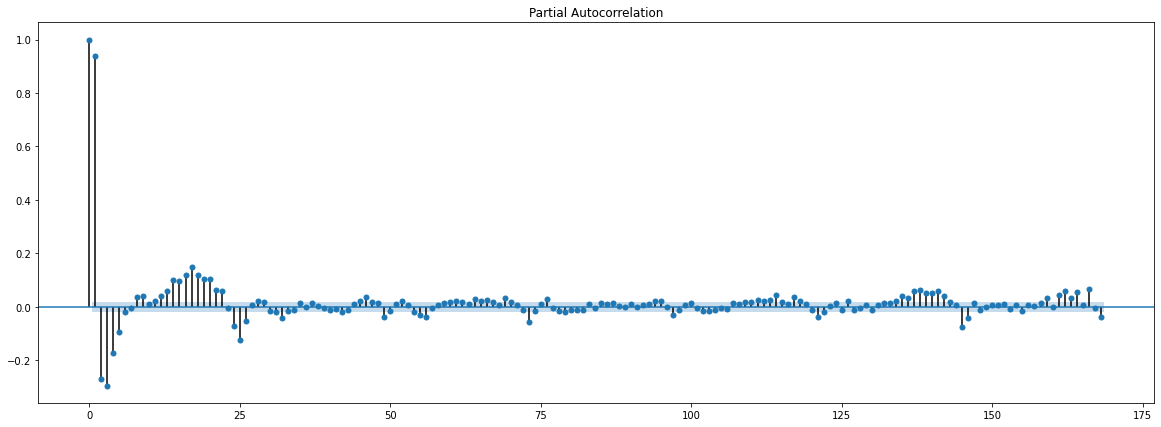

In [ ]:
fig,ax=plt.subplots(figsize=(20,7))
plot_pacf(train_df['casual'],lags=168,ax=ax)
plt.show()

**Feature Engineering**

In [ ]:
z=train_df.groupby(['season'])['temp','casual'].mean().reset_index()

In [ ]:
train_df['avg_temp_season']=np.nan

In [ ]:
for i in tqdm(list(train_df.index)):
  if train_df['season'][i]==1:
    train_df['avg_temp_season'][i]=z[z['season']==1]['temp']

  elif train_df['season'][i]==2:
     train_df['avg_temp_season'][i]=z[z['season']==2]['temp']

  elif train_df['season'][i]==3:
    train_df['avg_temp_season'][i]=z[z['season']==3]['temp']

  elif train_df['season'][i]==4:
    train_df['avg_temp_season'][i]=z[z['season']==4]['temp']

100%|██████████| 10886/10886 [00:07<00:00, 1437.63it/s]


In [ ]:
z=train_df.groupby(['season','month'])['temp','casual'].mean().reset_index()

In [ ]:
train_df['avg_temp_month']=np.nan

In [ ]:
for i in tqdm(list(train_df.index)):
  if train_df['season'][i]==1:
    if train_df['month'][i]==1:
      train_df['avg_temp_month'][i]=z[z['month']==1]['temp']

    elif train_df['month'][i]==2:
      train_df['avg_temp_month'][i]=z[z['month']==2]['temp']

    elif train_df['month'][i]==3:
      train_df['avg_temp_month'][i]=z[z['month']==3]['temp']



  elif train_df['season'][i]==2:
    if train_df['month'][i]==4:
      train_df['avg_temp_month'][i]=z[z['month']==4]['temp']

    elif train_df['month'][i]==5:
      train_df['avg_temp_month'][i]=z[z['month']==5]['temp']

    elif train_df['month'][i]==6:
      train_df['avg_temp_month'][i]=z[z['month']==6]['temp']


  elif train_df['season'][i]==3:
    if train_df['month'][i]==7:
      train_df['avg_temp_month'][i]=z[z['month']==7]['temp']

    elif train_df['month'][i]==8:
      train_df['avg_temp_month'][i]=z[z['month']==8]['temp']

    elif train_df['month'][i]==9:
      train_df['avg_temp_month'][i]=z[z['month']==9]['temp']


  elif train_df['season'][i]==4:
    if train_df['month'][i]==10:
      train_df['avg_temp_month'][i]=z[z['month']==10]['temp']

    elif train_df['month'][i]==11:
      train_df['avg_temp_month'][i]=z[z['month']==11]['temp']

    elif train_df['month'][i]==12:
      train_df['avg_temp_month'][i]=z[z['month']==12]['temp']

100%|██████████| 10886/10886 [00:07<00:00, 1454.26it/s]


In [ ]:
train_df['busy_hours_non_working_day']=np.nan

In [ ]:
for ind in tqdm(list(train_df[train_df['workingday']==0].index)):
  if train_df['hour'][ind]>=9 and train_df['hour'][ind]<=20:
    train_df['busy_hours_non_working_day'][ind]=1
  else:
    train_df['busy_hours_non_working_day'][ind]=0

100%|██████████| 3474/3474 [00:00<00:00, 12945.42it/s]


In [ ]:
train_df['busy_hours_non_working_day'].fillna(0,inplace=True)
train_df['busy_hours_non_working_day']=train_df['busy_hours_non_working_day'].astype(np.int32)

In [ ]:
train_df['increasing_users_working_day']=np.nan

In [ ]:
for ind in tqdm(list(train_df[train_df['workingday']==1].index)):
  if train_df['hour'][ind]>=7 and train_df['hour'][ind]<=17:
    train_df['increasing_users_working_day'][ind]=1
  else:
    train_df['increasing_users_working_day'][ind]=0

100%|██████████| 7412/7412 [00:00<00:00, 13312.27it/s]


In [ ]:
train_df['increasing_users_working_day'].fillna(0,inplace=True)
train_df['increasing_users_working_day']=train_df['increasing_users_working_day'].astype(np.int32)

In [ ]:
train_df.drop('temp',axis=1,inplace=True)

In [ ]:
validation_set=train_df[(train_df['day']>=18) & (train_df['day']<=19)] 

In [ ]:
train_df.drop('datetime',axis=1,inplace=True)

In [ ]:
train_df.columns

Index(['season', 'holiday', 'workingday', 'weather', 'atemp', 'humidity',
       'windspeed', 'casual', 'registered', 'count', 'hour', 'month', 'day',
       'year', 'avg_temp_season', 'avg_temp_month',
       'busy_hours_non_working_day', 'increasing_users_working_day'],
      dtype='object')

**Using LOFO for feature selection**

In [ ]:
cat_cols=['season','holiday','workingday','weather','hour','month','year','busy_hours_non_working_day','increasing_users_working_day','day']
num_features=['atemp','humidity','windspeed','avg_temp_season','avg_temp_month']

In [ ]:
features=cat_cols+num_features

In [ ]:
pip install lofo-importance

In [ ]:
from lofo import LOFOImportance,Dataset,plot_importance
from sklearn.model_selection import KFold

In [ ]:
train_df['casual']=np.log1p(train_df['casual'])
validation_set['casual']=np.log1p(validation_set['casual'])

In [ ]:
cv=KFold(n_splits=3,random_state=0,shuffle=False)

In [ ]:
dataset=Dataset(df=train_df,target='casual',features=features)

In [ ]:
import lightgbm
from lightgbm import LGBMRegressor

In [ ]:
model=LGBMRegressor(n_estimators=500,random_state=21)

In [ ]:
lofo_imp=LOFOImportance(dataset,scoring='neg_root_mean_squared_error',model=model,cv=cv,n_jobs=-1,fit_params={"categorical_feature": cat_cols})

In [ ]:
importance_df=lofo_imp.get_importance()

  0%|          | 0/15 [00:00<?, ?it/s]

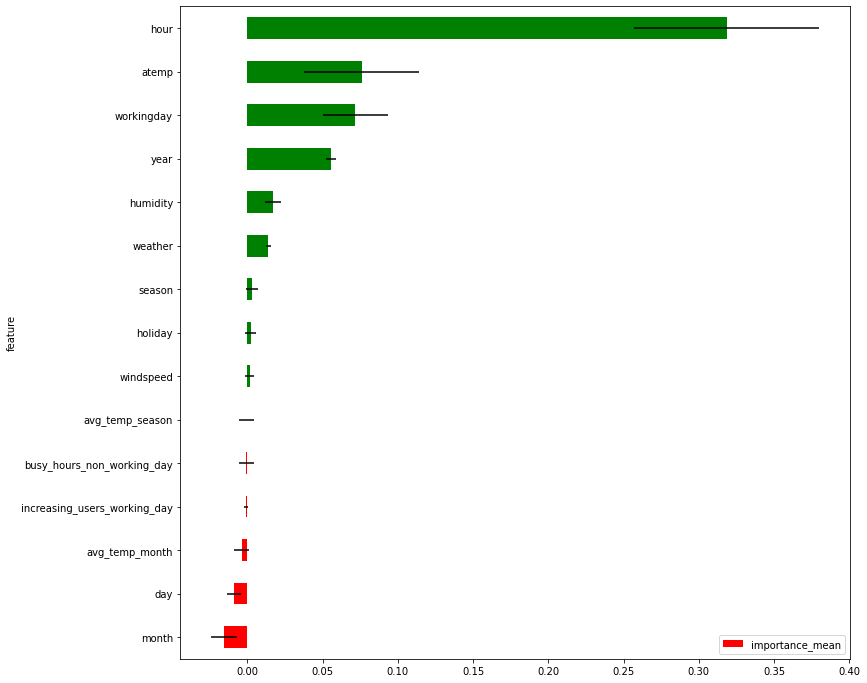

In [ ]:
plot_importance(importance_df,figsize=(12,12))

In [ ]:
y_train=train_df['casual'].values
train_df.drop(['casual','registered','count'],axis=1,inplace=True)
#train_df.drop(['increasing_users_working_day','season','busy_hours_non_working_day','month','day','casual','registered','count','holiday'],axis=1,inplace=True)

**Dropping features such as day month avg_temp_month increasing_users_working_day busy_hours_non_working_day avg_temp_season**

In [ ]:
train_df.drop(['month','day','avg_temp_month','increasing_users_working_day','busy_hours_non_working_day','avg_temp_season'],axis=1,inplace=True)
validation_set.drop(['month','day','avg_temp_month','increasing_users_working_day','busy_hours_non_working_day','avg_temp_season'],axis=1,inplace=True)

In [ ]:
#train_df.drop(['increasing_users_working_day','busy_hours_non_working_day'],axis=1,inplace=True)
#validation_set.drop(['increasing_users_working_day','busy_hours_non_working_day'],axis=1,inplace=True)

In [ ]:
y_valid=validation_set['casual'].values
validation_set.drop(['datetime','casual','registered','count'],axis=1,inplace=True)
#validation_set.drop(['datetime','increasing_users_working_day','season','busy_hours_non_working_day','month','day','casual','registered','count','holiday'],axis=1,inplace=True)

**Hyperparameter tuning**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
import xgboost
import lightgbm
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
rf_params={'max_depth':[20,22,24,27,30,32]}

In [ ]:
rf_reg=RandomForestRegressor()

In [ ]:
rf_cv=RandomizedSearchCV(rf_reg,rf_params,scoring='neg_root_mean_squared_error',n_jobs=-1,cv=3,verbose=60,n_iter=20,random_state=0)
rf_cv.fit(train_df,y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    9.6s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:   12.3s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   12.5s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   15.2s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   15.3s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:   18.3s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:   18.4s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:   21.4s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   21

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [ ]:
rf_cv.best_score_

-0.6277459566011098

In [ ]:
rf_cv.best_params_

{'max_depth': 20}

In [ ]:
rf_reg_rs=RandomForestRegressor(max_depth=20)
rf_reg_rs.fit(train_df,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=20, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
y_pred_valid=rf_reg_rs.predict(validation_set)

In [ ]:
valid_rmsle_score=np.sqrt(mean_squared_error(y_valid,y_pred_valid))
valid_rmsle_score

0.1946307369596483

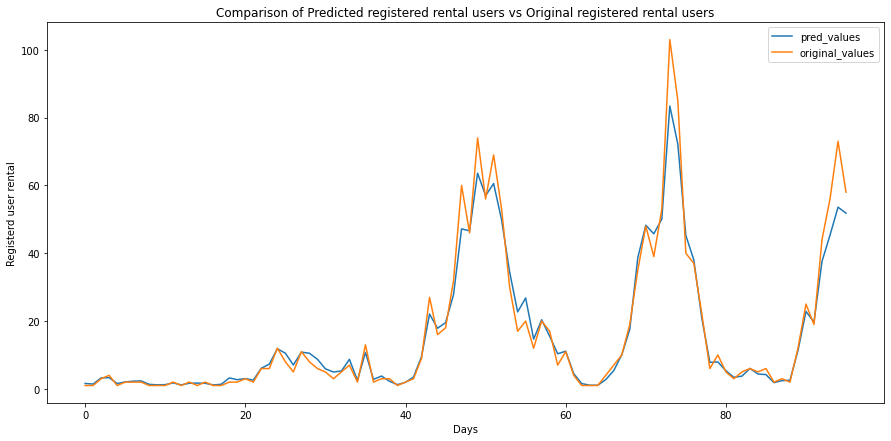

In [ ]:
plt.figure(figsize=(15,7))
plt.plot(np.arange(96),np.exp(y_pred_valid)[:96])
plt.plot(np.arange(96),np.exp(y_valid)[:96])
plt.legend(['pred_values','original_values'])
plt.xlabel('Days')
plt.ylabel('Registerd user rental')
plt.title('Comparison of Predicted registered rental users vs Original registered rental users')
plt.show()

In [ ]:
#XGBREGRESSOR

In [ ]:
xgb_params={'max_depth':[20,22,25,27,30]}

In [ ]:
xgb_reg=XGBRegressor()

In [ ]:
xgb_rs_cv=RandomizedSearchCV(xgb_reg,xgb_params,n_jobs=-1,n_iter=10,cv=3,scoring='neg_root_mean_squared_error',verbose=90,random_state=21)
xgb_rs_cv.fit(train_df,y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   13.8s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:   14.0s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:   18.5s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   18.8s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   23.2s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   23.7s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:   28.1s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:   28.5s
[Parallel(n_jobs=-1)]: Done  13 out of  15 | elapsed:   33.6s remaining:    5.2s
[Parallel(n_jobs=-1)]: Done  15 out of 

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_state=0, reg_alpha=0,
                                          reg_lambda=1, scale_pos_weight=1,
                                          seed=None, silent=None, subsample=1,
                                  

In [ ]:
xgb_rs_cv.best_score_

-0.6664535483618479

In [ ]:
xgb_rs_cv.best_params_

{'max_depth': 25}

In [ ]:
xgb_reg_modified=XGBRegressor(max_depth=25)
xgb_reg_modified.fit(train_df,y_train)

[13:19:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=25, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
y_pred_valid_xgb=xgb_reg_modified.predict(validation_set)

In [ ]:
valid_rmsle_score_xgb=np.sqrt(mean_squared_error(y_valid,y_pred_valid_xgb))
print(valid_rmsle_score_xgb)

0.038500438585443934


In [ ]:
np.exp(y_pred_valid_xgb)[:10]

array([1.0015426 , 0.99979347, 3.0014787 , 3.997281  , 1.0023373 ,
       2.0006535 , 1.9995555 , 2.0002432 , 1.0009441 , 1.000518  ],
      dtype=float32)

In [ ]:
np.exp(y_valid)[:10]

array([1., 1., 3., 4., 1., 2., 2., 2., 1., 1.])

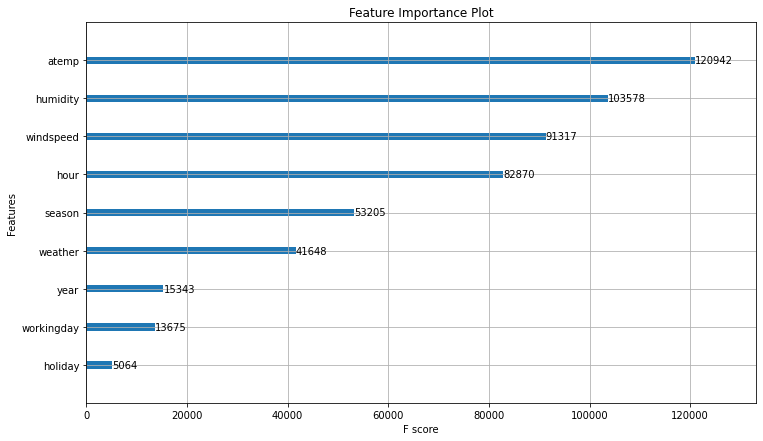

In [ ]:
fig,ax=plt.subplots(figsize=(12,7))
xgboost.plot_importance(xgb_reg_modified,ax=ax)
plt.title('Feature Importance Plot')
plt.show()

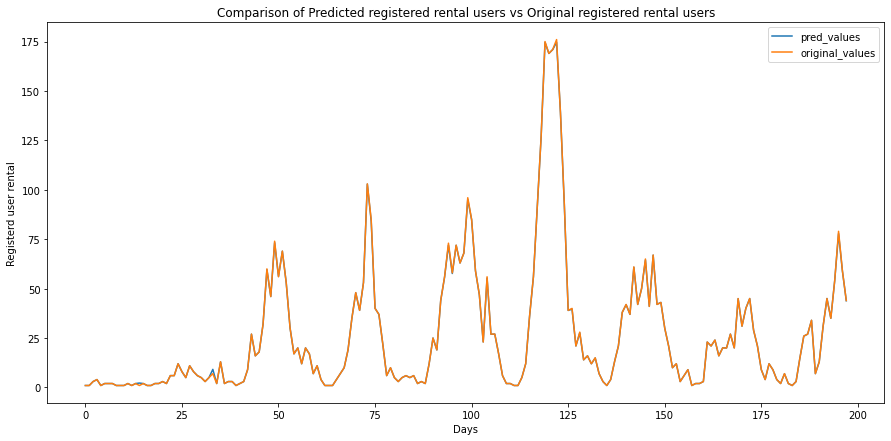

In [ ]:
plt.figure(figsize=(15,7))
plt.plot(np.arange(198),np.exp(y_pred_valid_xgb)[:198])
plt.plot(np.arange(198),np.exp(y_valid)[:198])
plt.legend(['pred_values','original_values'])
plt.xlabel('Days')
plt.ylabel('Registerd user rental')
plt.title('Comparison of Predicted registered rental users vs Original registered rental users')
plt.show()

In [ ]:
#LGBREGRESSOR

In [ ]:
lgb_params={'max_depth':[20,22,25,27,30,35],
            'n_estimators':[10000,20000,30000,40000,50000]}

In [ ]:
lgb_reg=LGBMRegressor()

In [ ]:
lgb_rf_cv=RandomizedSearchCV(lgb_reg,lgb_params,n_iter=10,cv=3,verbose=90,scoring='neg_root_mean_squared_error',n_jobs=-1,random_state=21)
lgb_rf_cv.fit(train_df,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   16.8s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   17.1s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:   30.4s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  5.

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=LGBMRegressor(boosting_type='gbdt',
                                           class_weight=None,
                                           colsample_bytree=1.0,
                                           importance_type='split',
                                           learning_rate=0.1, max_depth=-1,
                                           min_child_samples=20,
                                           min_child_weight=0.001,
                                           min_split_gain=0.0, n_estimators=100,
                                           n_jobs=-1, num_leaves=31,
                                           objective=None, random_state=None,
                                           reg_alpha=0.0, reg_lambda=0.0,
                                           silent=True, subsample=1.0,
                                           subsample_for_bin=200000,
                                           subsa

In [ ]:
lgb_rf_cv.best_score_

-0.6887893585035668

In [ ]:
lgb_rf_cv.best_params_

{'max_depth': 22, 'n_estimators': 10000}

In [ ]:
lgb_reg_modified=LGBMRegressor(max_depth=22,n_estimators=35000)
lgb_reg_modified.fit(train_df,y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=22,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=35000, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
y_pred_valid_lgbm=lgb_reg_modified.predict(validation_set)

In [ ]:
valid_rmsle_score_lgbm=np.sqrt(mean_squared_error(y_valid,y_pred_valid_lgbm))
valid_rmsle_score_lgbm

0.03906339350650847

In [ ]:
np.exp(y_pred_valid_lgbm)[:10]

array([1.00141479, 0.9986545 , 3.01554781, 3.99318346, 1.00332015,
       1.9949125 , 1.99560383, 2.00589463, 1.00082618, 0.99780885])

In [ ]:
np.exp(y_valid)[:10]

array([1., 1., 3., 4., 1., 2., 2., 2., 1., 1.])

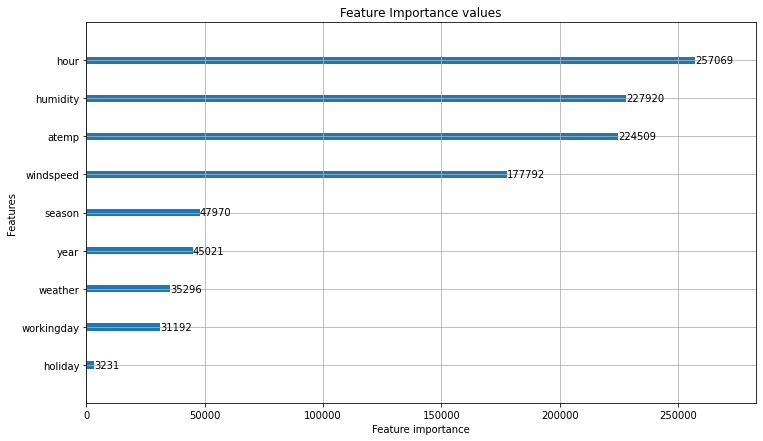

In [ ]:
fig,ax=plt.subplots(figsize=(12,7))
lightgbm.plot_importance(lgb_reg_modified,ax=ax)
plt.title('Feature Importance values')
plt.show()

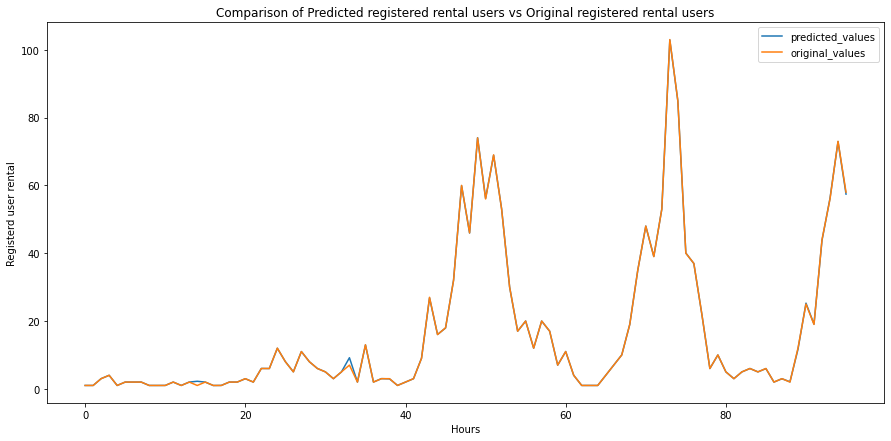

In [ ]:
plt.figure(figsize=(15,7))
plt.plot(np.arange(96),np.exp(y_pred_valid_lgbm)[:96])
plt.plot(np.arange(96),np.exp(y_valid)[:96])
plt.legend(['predicted_values','original_values'])
plt.xlabel('Hours')
plt.ylabel('Registerd user rental')
plt.title('Comparison of Predicted registered rental users vs Original registered rental users')
plt.show()

In [ ]:
my_file=open('xgb_reg_modified_casual_users.txt','wb')
pickle.dump(xgb_reg_modified,my_file)
my_file.close()

In [ ]:
#my_model=open('/content/rf_reg_rs_modified.txt','rb')
#rf_reg_rs=pickle.load(my_model)

**Predicting it on the test set**

In [ ]:
test_df=pd.read_csv('/content/drive/MyDrive/test_bk.csv')

In [ ]:
test_df['datetime']=pd.to_datetime(test_df['datetime'])

In [ ]:
test_df['hour']=test_df['datetime'].dt.hour
test_df['month']=test_df['datetime'].dt.month
test_df['day']=test_df['datetime'].dt.day
test_df['year']=test_df['datetime'].dt.year

In [ ]:
z=test_df.groupby(['season','month'])['temp'].mean().reset_index()

In [ ]:
test_df['avg_temp_month']=np.nan

In [ ]:
for i in tqdm(list(test_df.index)):
  if test_df['season'][i]==1:
    if test_df['month'][i]==1:
      test_df['avg_temp_month'][i]=z[z['month']==1]['temp']

    elif test_df['month'][i]==2:
      test_df['avg_temp_month'][i]=z[z['month']==2]['temp']

    elif test_df['month'][i]==3:
      test_df['avg_temp_month'][i]=z[(z['month']==3)&(z['season']==1)]['temp']

    elif test_df['month'][i]==12:
      test_df['avg_temp_month'][i]=z[(z['month']==12)&(z['season']==1)]['temp']



  elif test_df['season'][i]==2:
    if test_df['month'][i]==4:
      test_df['avg_temp_month'][i]=z[z['month']==4]['temp']

    elif test_df['month'][i]==5:
      test_df['avg_temp_month'][i]=z[z['month']==5]['temp']

    elif test_df['month'][i]==6:
      test_df['avg_temp_month'][i]=z[(z['month']==6) & (z['season']==2)]['temp']


    elif test_df['month'][i]==3:
      test_df['avg_temp_month'][i]=z[(z['month']==3) & (z['season']==2)]['temp']


  elif test_df['season'][i]==3:
    if test_df['month'][i]==7:
      test_df['avg_temp_month'][i]=z[z['month']==7]['temp']

    elif test_df['month'][i]==8:
      test_df['avg_temp_month'][i]=z[z['month']==8]['temp']

    elif test_df['month'][i]==9:
      test_df['avg_temp_month'][i]=z[(z['month']==9) & (z['season']==3)]['temp']


    elif test_df['month'][i]==6:
      test_df['avg_temp_month'][i]=z[(z['month']==6) & (z['season']==3)]['temp']


  elif test_df['season'][i]==4:


    if test_df['month'][i]==10:
      test_df['avg_temp_month'][i]=z[z['month']==10]['temp']

    elif test_df['month'][i]==11:
      test_df['avg_temp_month'][i]=z[z['month']==11]['temp']

    elif test_df['month'][i]==12:
      test_df['avg_temp_month'][i]=z[(z['month']==12) & (z['season']==4)]['temp']


    elif test_df['month'][i]==9:
      test_df['avg_temp_month'][i]=z[(z['month']==9) & (z['season']==4)]['temp']

100%|██████████| 6493/6493 [00:05<00:00, 1170.84it/s]


In [ ]:
z=test_df.groupby(['season'])['temp'].mean().reset_index()

In [ ]:
test_df['avg_temp_season']=np.nan

In [ ]:
for i in tqdm(list(test_df.index)):
  if test_df['season'][i]==1:
    test_df['avg_temp_season'][i]=z[z['season']==1]['temp']

  elif test_df['season'][i]==2:
     test_df['avg_temp_season'][i]=z[z['season']==2]['temp']

  elif test_df['season'][i]==3:
    test_df['avg_temp_season'][i]=z[z['season']==3]['temp']

  elif test_df['season'][i]==4:
    test_df['avg_temp_season'][i]=z[z['season']==4]['temp']

100%|██████████| 6493/6493 [00:04<00:00, 1375.17it/s]


In [ ]:
test_df['busy_hours_non_working_day']=np.nan

In [ ]:
for ind in tqdm(list(test_df[test_df['workingday']==0].index)):
  if test_df['hour'][ind]>=9 and test_df['hour'][ind]<=20:
    test_df['busy_hours_non_working_day'][ind]=1
  else:
    test_df['busy_hours_non_working_day'][ind]=0

100%|██████████| 2040/2040 [00:00<00:00, 12087.21it/s]


In [ ]:
test_df['busy_hours_non_working_day'].fillna(0,inplace=True)
test_df['busy_hours_non_working_day']=test_df['busy_hours_non_working_day'].astype(np.int32)

In [ ]:
test_df['increasing_users_working_day']=np.nan

In [ ]:
for ind in tqdm(list(test_df[test_df['workingday']==1].index)):
  if test_df['hour'][ind]>=7 and test_df['hour'][ind]<=17:
    test_df['increasing_users_working_day'][ind]=1
  else:
    test_df['increasing_users_working_day'][ind]=0

100%|██████████| 4453/4453 [00:00<00:00, 11586.86it/s]


In [ ]:
test_df['increasing_users_working_day'].fillna(0,inplace=True)
test_df['increasing_users_working_day']=test_df['increasing_users_working_day'].astype(np.int32)

In [ ]:
datetime=test_df['datetime'].values

In [ ]:
test_df.drop(['temp','datetime'],axis=1,inplace=True)

In [ ]:
test_df.drop(['month','day','avg_temp_month','increasing_users_working_day','busy_hours_non_working_day','avg_temp_season'],axis=1,inplace=True)

**Doing final predictions using xgb model**

In [ ]:
final_pred=xgb_reg_modified.predict(test_df)

In [ ]:
final_pred_org=np.exp(final_pred)

In [ ]:
final_pred_df=pd.DataFrame({'datetime':datetime,'casual_users':final_pred_org})

In [ ]:
final_pred_df.to_csv('final_ped_casual_users_modified_4.csv',index=False)